In [14]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy import ndimage
import PIL

from persim import plot_diagrams
from ripser import ripser, lower_star_img

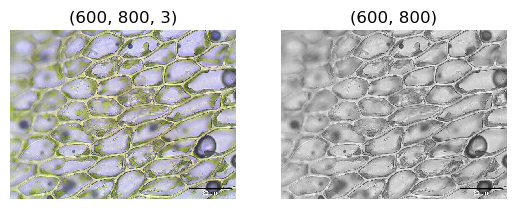

In [15]:
#basically ripped from https://ripser.scikit-tda.org/Lower%20Star%20Image%20Filtrations.html with different data source
cells_original = plt.imread("plant_cells.jpeg")
cells_grey = np.asarray(PIL.Image.fromarray(cells_original).convert('L'))

plt.subplot(121)
plt.title(cells_original.shape)
plt.imshow(cells_original)
plt.axis('off')
plt.subplot(122)
plt.title(cells_grey.shape)
plt.imshow(cells_grey, cmap='gray')
plt.axis('off')
plt.show()

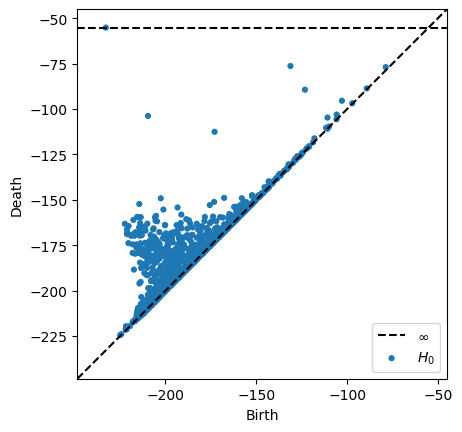

In [19]:
dgm = lower_star_img(-smoothed)
plot_diagrams(dgm)
plt.show()

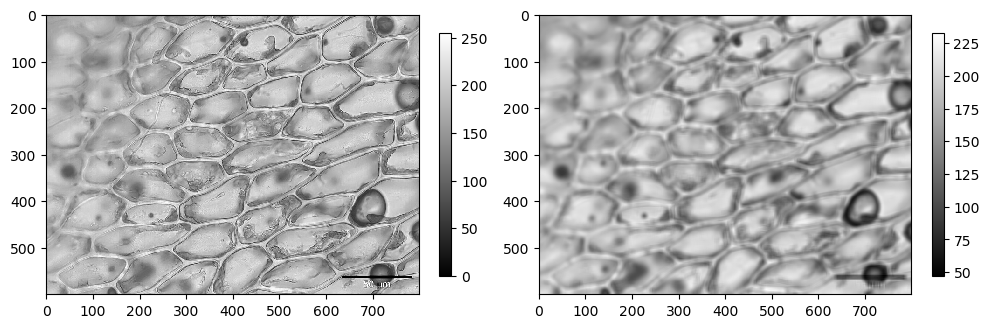

In [17]:

smoothed = ndimage.uniform_filter(cells_grey.astype(np.float64), size=10)
smoothed += 0.01 * np.random.randn(*smoothed.shape)

plt.figure(figsize=(10, 5))
plt.subplot(121)
im = plt.imshow(cells_grey, cmap='gray')
plt.colorbar(im, fraction=0.03)

plt.subplot(122)
im = plt.imshow(smoothed, cmap='gray')
plt.colorbar(im, fraction=0.03)

plt.tight_layout()
plt.show()

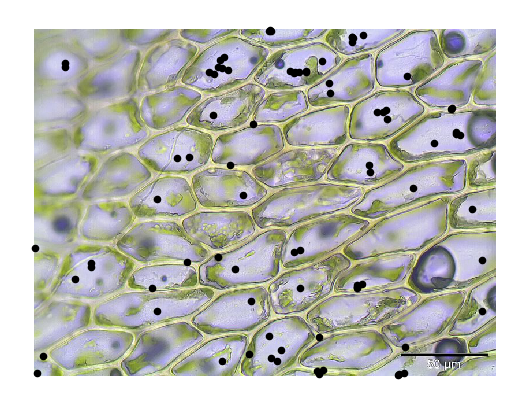

In [18]:
thresh = 30 #I also changed this value - doesn't work as well as other example but more importantly we got a PD from an image.
idxs = np.arange(dgm.shape[0])
idxs = idxs[np.abs(dgm[:, 1] - dgm[:, 0]) > thresh]

plt.figure(figsize=(8, 5))
plt.imshow(cells_original)

X, Y = np.meshgrid(np.arange(smoothed.shape[1]), np.arange(smoothed.shape[0]))
X = X.flatten()
Y = Y.flatten()
for idx in idxs:
    bidx = np.argmin(np.abs(smoothed + dgm[idx, 0]))
    plt.scatter(X[bidx], Y[bidx], 20, 'k')
plt.axis('off')

plt.show()